In [1]:
# importing libraries and data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# importing data
path = 'C:/Users/amuly/Gun Violence/'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'gun_cleaned.csv'))

In [3]:
df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,gun_stolen,gun_type,incident_characteristics,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female
1,1,460726,2013-01-01,California,Hawthorne,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male
2,2,478855,2013-01-01,Ohio,Lorain,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male
3,3,478925,2013-01-05,Colorado,Aurora,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male
4,4,478959,2013-01-07,North Carolina,Greensboro,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
#transform the data
df_sub = df[['date', 'n_killed','n_injured','n_guns_involved']]

df_sub['datetime'] = pd.to_datetime(df['date'])
df_sub = df_sub.set_index('datetime')
df_sub.drop(['date'], axis=1, inplace=True)
df_sub.head()

,n_killed,n_injured,n_guns_involved
datetime,,,
2013-01-01,0,4,NaN
2013-01-01,1,3,NaN
2013-01-01,1,3,2.0
2013-01-05,4,0,NaN
2013-01-07,2,2,2.0


In [6]:
# to find monthly sum of data
df_monthly = df_sub.resample('M').sum()

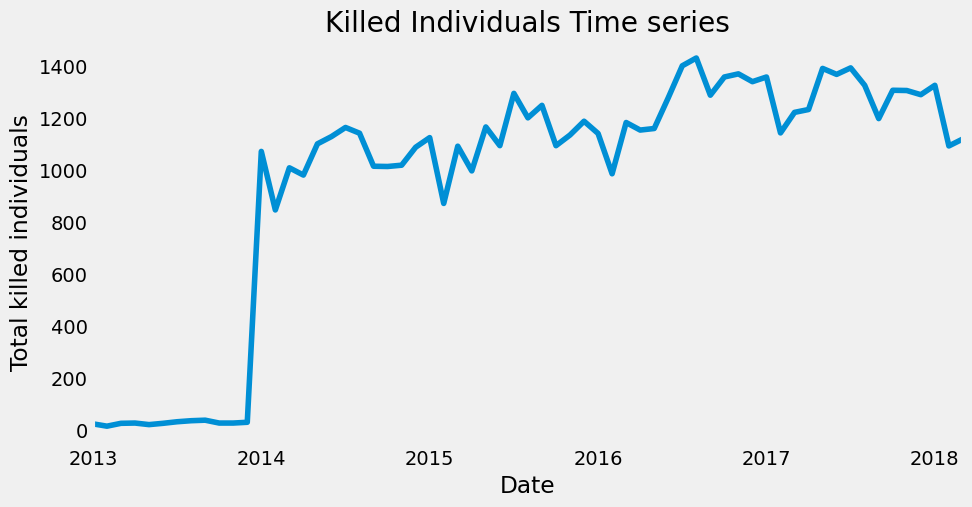

In [7]:
plt.figure(figsize=(10,5))
df_monthly['n_killed'].plot()
plt.title('Killed Individuals Time series')
plt.xlabel('Date')
plt.ylabel('Total killed individuals')
plt.grid(False)
plt.show()

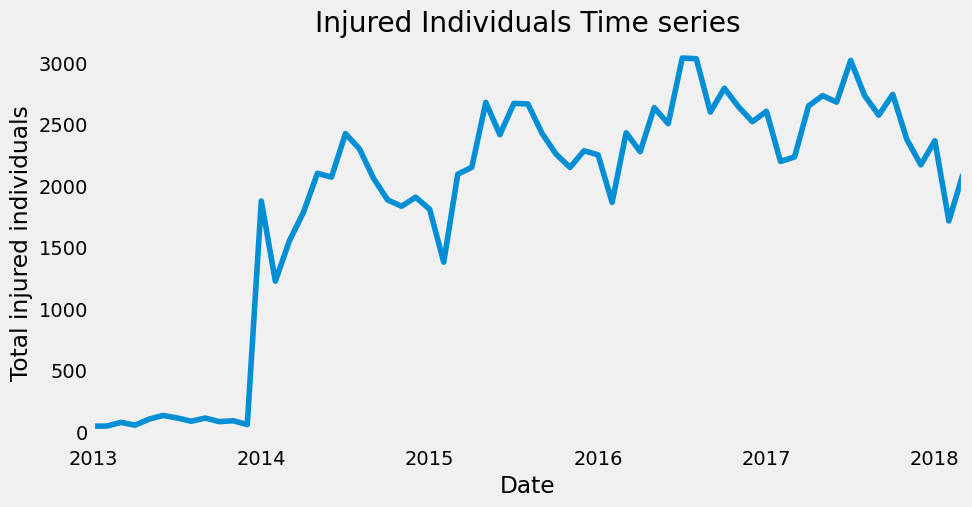

In [8]:
plt.figure(figsize=(10,5))
df_monthly['n_injured'].plot()
plt.title('Injured Individuals Time series')
plt.xlabel('Date')
plt.ylabel('Total injured individuals')
plt.grid(False)
plt.show()

#### decomposition

In [9]:
# Decomposition of killed individuals 
decomposition = sm.tsa.seasonal_decompose(df_monthly['n_killed'], model='additive')

In [10]:
print("Trend component:")
print(decomposition.trend.head())

Trend component:
datetime
2013-01-31   NaN
2013-02-28   NaN
2013-03-31   NaN
2013-04-30   NaN
2013-05-31   NaN
Freq: ME, Name: trend, dtype: float64


In [11]:
print("\nSeasonal component:")
print(decomposition.seasonal.head())


Seasonal component:
datetime
2013-01-31    138.116146
2013-02-28   -101.477604
2013-03-31     37.522396
2013-04-30    -23.123438
2013-05-31     63.491146
Freq: ME, Name: seasonal, dtype: float64


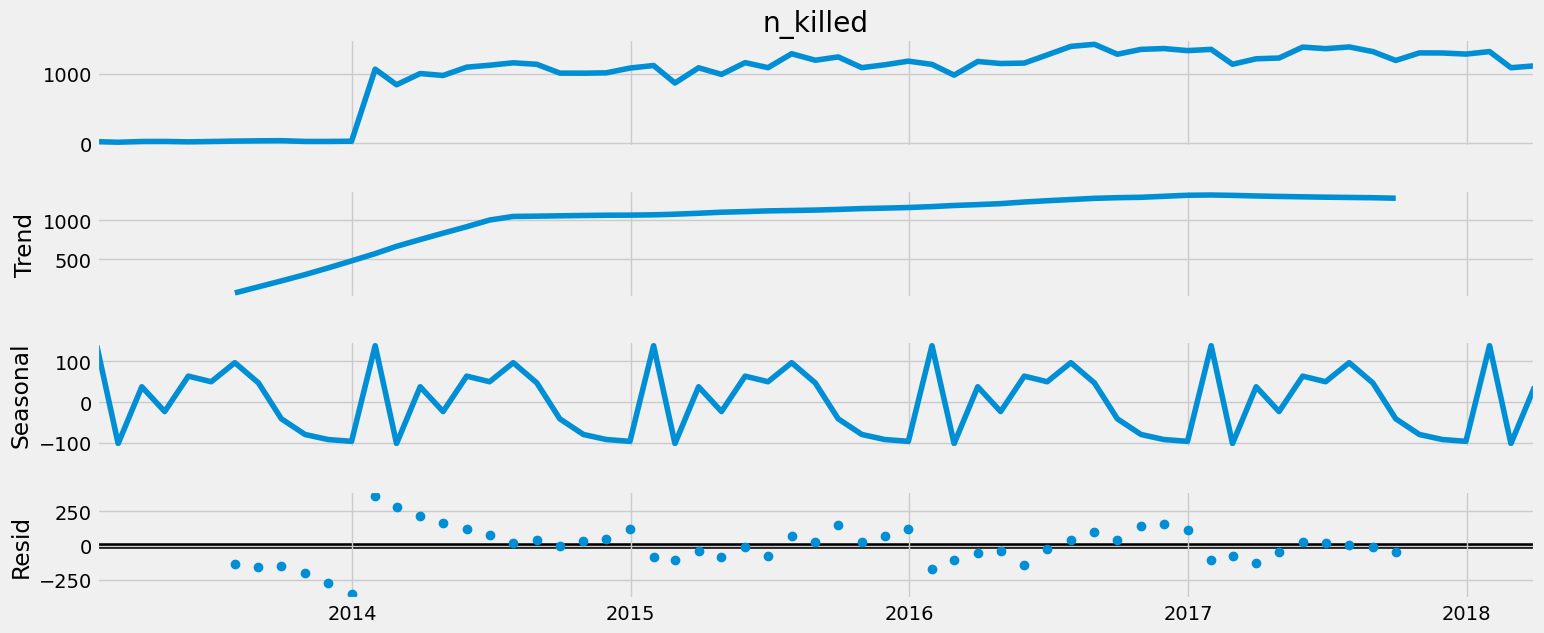

In [12]:
fig = decomposition.plot()
fig.set_size_inches(18, 7)
plt.show()

#### When I look at the decomposition of the n_killed data, I can see three main things. First, the trend goes up quickly at the start and then seems to flatten out somewhere between 2014 and 2015 staying more stable afterwards. Second, there’s a seasonal pattern that repeats every year where some months are always higher and some months are lower. That means the data has a regular cycle. Third, the residuals is quite small so the model is doing a good job of explaining the data. I also notice that the early part of 2013–2014 looks strange probably because the data wasn’t collected consistently at that time. So, for better results it makes more sense to focus on 2014 and later. Overall, I’ve learned that the data shows an upward movement at first, then it stabilizes and it also has a strong seasonal rhythm.

In [13]:
# injured individuals decomposition
decomposition_inj = sm.tsa.seasonal_decompose(df_monthly['n_injured'], model='additive', period=7)

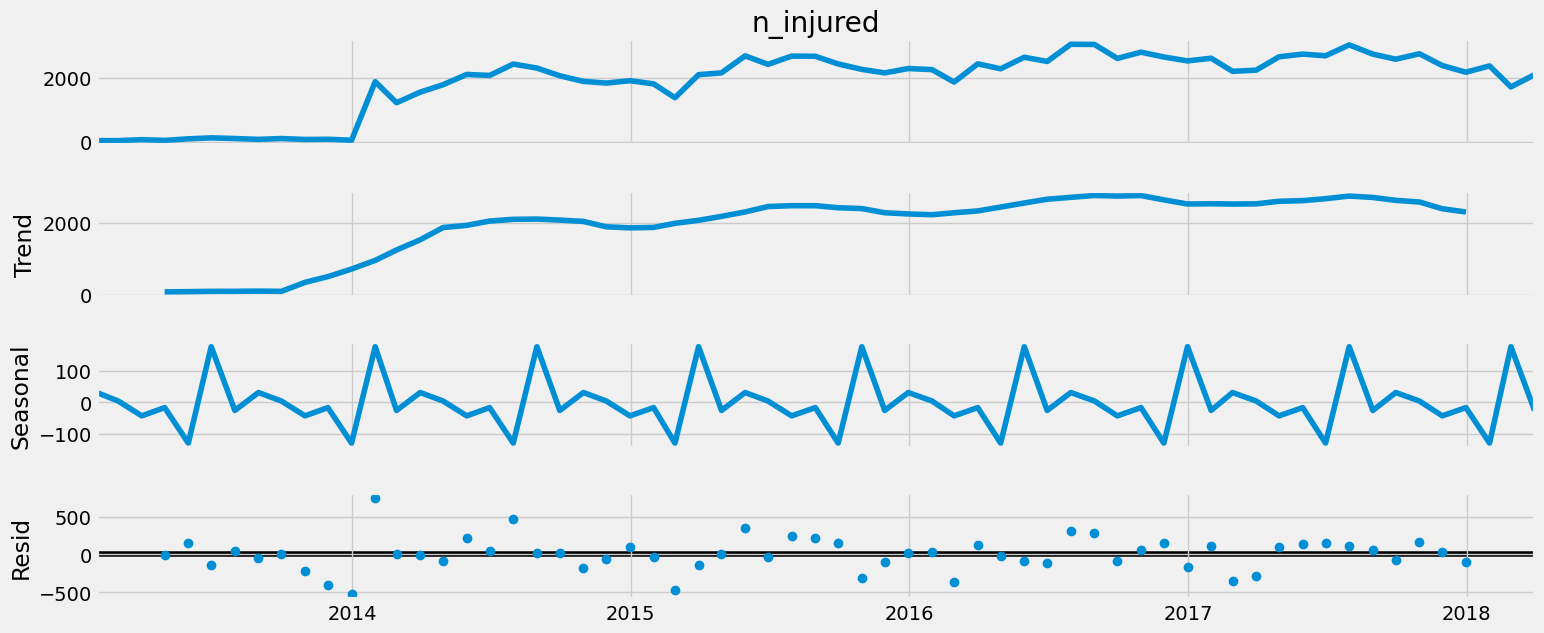

In [14]:
fig_inj = decomposition_inj.plot()
fig_inj.set_size_inches(18, 7)
plt.show()

#### The trend rises quickly up to 2015 and then stabilizes at a high level showing more consistent values afterward. The seasonal component indicates a repeating yearly cycle with some months regularly higher or lower. Residuals are relatively small except for early 2014 where data quality issues are likely. 

In [15]:
# guns involved decomposition
decomposition_gun = sm.tsa.seasonal_decompose(df_monthly['n_guns_involved'], model='additive', period=7)

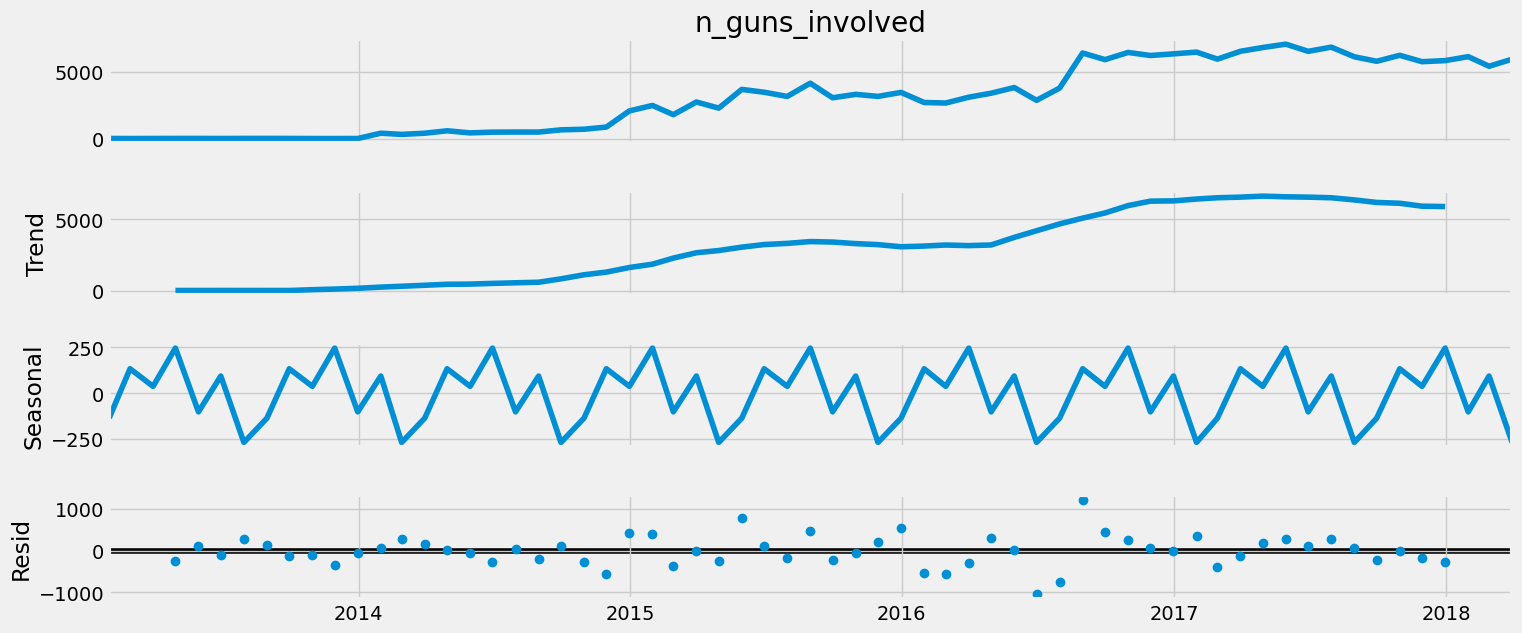

In [16]:
fig_gun = decomposition_gun.plot()
fig_gun.set_size_inches(18, 7)
plt.show()

#### The trend shows a steady increase through 2014–2016 with a sharper rise around 2016 before stabilizing at a high level. The seasonal component reveals a consistent yearly cycle with repeating peaks and dips each year. Residuals remain relatively small compared to the overall series except for a few larger deviations after 2016. 

### Dickey-Fuller test for stationary

In [17]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_monthly['n_killed'])

Dickey-Fuller Stationarity test:
Test Statistic                -9.577716e+00
p-value                        2.200454e-16
Number of Lags Used            1.100000e+01
Number of Observations Used    5.100000e+01
Critical Value (1%)           -3.565624e+00
Critical Value (5%)           -2.920142e+00
Critical Value (10%)          -2.598015e+00
dtype: float64


Null hypothesis (H₀): The series has a unit root.

Alternative hypothesis (H₁): The series doesn't have a unit root.

The test statistic is -9.58 which is far below all of the critical values at the 1%, 5% and 10% significance levels. The p-value is extremely small (≈ 2.2e-16) well below 0.01. This means we can confidently reject the null hypothesis of a unit root.

The series is stationary

In [18]:
# conduct test for n_injured
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_monthly['n_injured'])

Dickey-Fuller Stationarity test:
Test Statistic                -7.144769e+00
p-value                        3.254254e-10
Number of Lags Used            1.100000e+01
Number of Observations Used    5.100000e+01
Critical Value (1%)           -3.565624e+00
Critical Value (5%)           -2.920142e+00
Critical Value (10%)          -2.598015e+00
dtype: float64


#### same as n_killed this one is also stationary

In [19]:
# conduct test for n_guns_involved
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_monthly['n_guns_involved'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.783363
p-value                         0.823960
Number of Lags Used             1.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64


#### Test statistic is -0.78 which is higher than all of the critical values at the 1%, 5% and 10% significance levels. The p-value is 0.82 which is far above the usual thresholds for significance. This means we cannot reject the null hypothesis of a unit root. n_guns_involved series is non-stationary.

## stationarizing the n_guns_involved data

In [20]:
data_diff = df_sub - df_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [21]:
data_diff.head()

,n_killed,n_injured,n_guns_involved
datetime,,,
2013-01-01,NaN,NaN,NaN
2013-01-01,1.0,-1.0,NaN
2013-01-01,0.0,0.0,NaN
2013-01-05,3.0,-3.0,NaN
2013-01-07,-2.0,2.0,NaN


In [22]:
# Remove any mising values as a result of the differencing
data_diff.dropna(inplace=True)

In [23]:
data_diff.head()

,n_killed,n_injured,n_guns_involved
datetime,,,
2013-01-25,0.0,0.0,0.0
2013-01-26,1.0,0.0,0.0
2013-01-26,-2.0,2.0,0.0
2013-02-03,1.0,-2.0,0.0
2013-03-10,-2.0,3.0,0.0


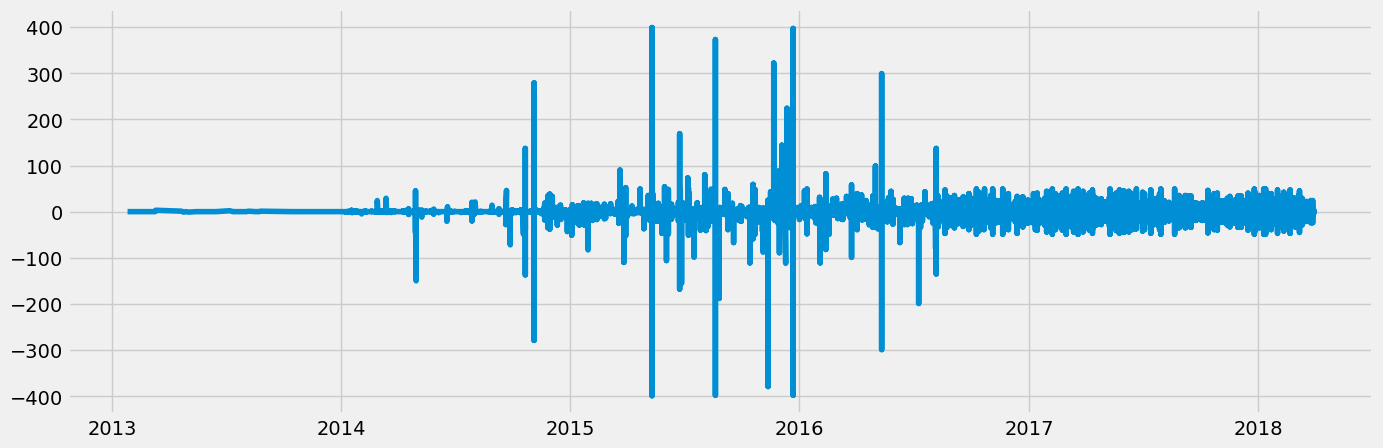

In [24]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff['n_guns_involved'])

In [25]:
# Apply the test using the function on the time series
dickey_fuller(data_diff['n_guns_involved'])

Dickey-Fuller Stationarity test:
Test Statistic                    -46.206847
p-value                             0.000000
Number of Lags Used                71.000000
Number of Observations Used    116790.000000
Critical Value (1%)                -3.430406
Critical Value (5%)                -2.861565
Critical Value (10%)               -2.566783
dtype: float64


### the series is stationary now. Test statistic value (-46) is far less than critical values and p-value is below 0.05

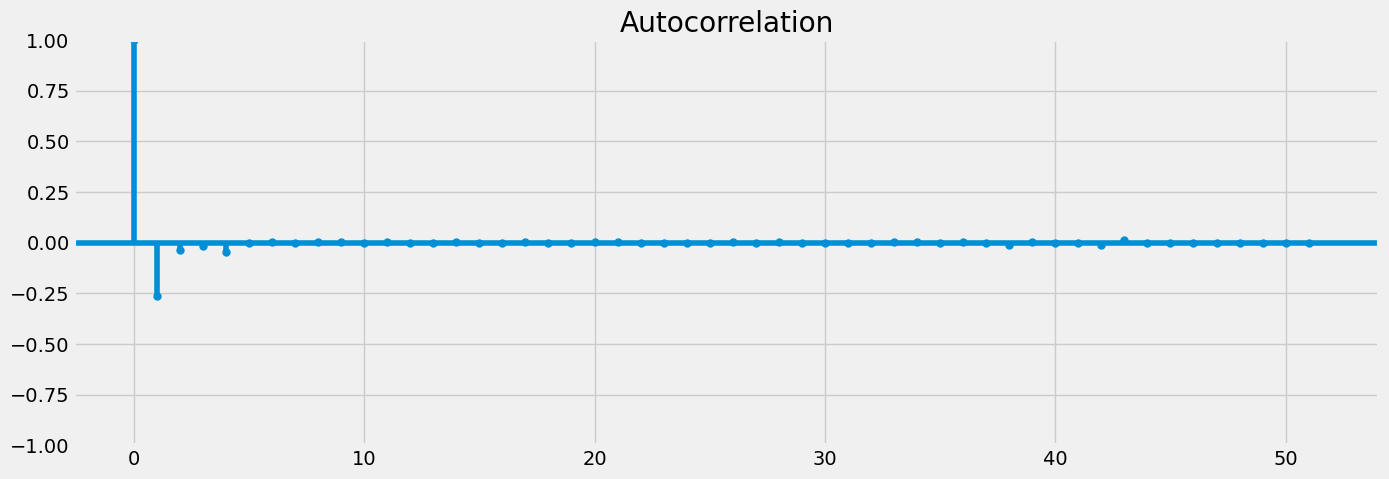

In [26]:
# Check the data's autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
fig, ax = plt.subplots(figsize=(15,5))
plot_acf(data_diff['n_guns_involved'], ax=ax)
plt.show()

#### The series shows a strong correlation at lag 0 a small negative value at lag 1 and near-zero correlations for all higher lags. This suggests that after differencing, n_guns_involved behaves like a stationary series.

In [27]:
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,gun_stolen,gun_type,incident_characteristics,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female
1,460726,2013-01-01,California,Hawthorne,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male
2,478855,2013-01-01,Ohio,Lorain,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male
3,478925,2013-01-05,Colorado,Aurora,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male
4,478959,2013-01-07,North Carolina,Greensboro,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female


In [28]:
df_tab = df[['state','n_killed','n_injured','n_guns_involved','latitude','longitude']]

In [29]:
df_tab.head()

,state,n_killed,n_injured,n_guns_involved,latitude,longitude
0,Pennsylvania,0,4,NaN,40.3467,-79.8559
1,California,1,3,NaN,33.9090,-118.3330
2,Ohio,1,3,2.0,41.4455,-82.1377
3,Colorado,4,0,NaN,39.6518,-104.8020
4,North Carolina,2,2,2.0,36.1140,-79.9569


In [30]:
df_tab.to_csv(os.path.join(path,'02 Data','Prepared Data', 'gun_tab.csv'))